In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdurraziq01/cloud-computing-performance-metrics")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cloud-computing-performance-metrics' dataset.
Path to dataset files: /kaggle/input/cloud-computing-performance-metrics


In [83]:
import pandas as pd
import os

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'vmCloud_data.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB


In [85]:
df.describe()

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency
count,1.800962e+06,1.799490e+06,1.800519e+06,1.799729e+06,1.800314e+06,1.800173e+06,1.799958e+06
mean,5.001223e+01,4.998190e+01,5.000076e+02,2.500584e+02,5.001897e+03,4.997133e+01,5.002524e-01
std,2.887661e+01,2.885326e+01,2.885793e+02,1.443634e+02,2.885247e+03,2.886130e+01,2.886669e-01
min,7.071203e-05,2.516784e-06,1.890490e-04,1.923802e-04,0.000000e+00,1.036192e-06,1.258445e-07
25%,2.497675e+01,2.500378e+01,2.500669e+02,1.249695e+02,2.504000e+03,2.497908e+01,2.501631e-01
50%,5.005476e+01,4.997609e+01,5.000076e+02,2.502472e+02,5.002000e+03,4.996407e+01,5.003692e-01
75%,7.502934e+01,7.495588e+01,7.498175e+02,3.751069e+02,7.502000e+03,7.497650e+01,7.503617e-01
max,9.999997e+01,9.999993e+01,9.999998e+02,4.999993e+02,9.999000e+03,9.999999e+01,1.000000e+00


In [86]:
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [87]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [88]:
df = df.sort_values(by='timestamp')

In [89]:
df = df.dropna()

In [90]:
df['cpu_norm'] = (df['cpu_usage'] - df['cpu_usage'].min()) / \
                 (df['cpu_usage'].max() - df['cpu_usage'].min())


In [91]:
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,cpu_norm
898414,fe5e04e3-4ea4-48cf-a193-3f58abd147ed,2023-01-01 00:00:31,14.019569,74.367251,600.520958,368.735533,8240.0,50.742393,0.639539,network,medium,waiting,0.140195
1505883,ca081259-cb36-4c07-a7db-5af5f8676930,2023-01-01 00:00:40,99.077509,71.444353,760.884810,196.374567,792.0,17.032331,0.678037,network,low,waiting,0.990780
1189161,c8e53b6b-07aa-4166-b588-a0c46ce29f3a,2023-01-01 00:01:09,89.889006,5.710089,453.161356,310.077375,8403.0,14.146201,0.862283,network,high,running,0.898894
831735,f190f9e4-8b34-4538-9dc6-e418616ae32e,2023-01-01 00:01:56,99.513676,57.289428,672.079977,18.341540,3425.0,14.170914,0.704593,network,low,completed,0.995141
1477338,6af81feb-2422-4574-bc7d-6f4487ad0862,2023-01-01 00:02:33,30.082095,98.245805,852.144664,10.868683,6702.0,76.826219,0.343826,compute,high,waiting,0.300821


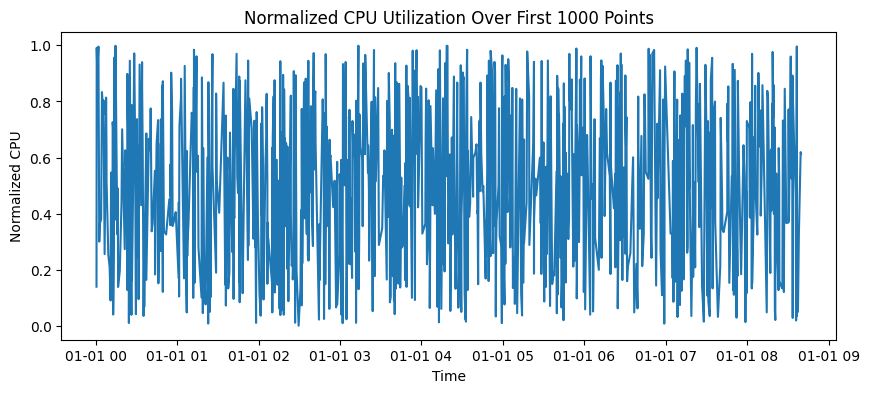

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['timestamp'][:1000], df['cpu_norm'][:1000])
plt.title('Normalized CPU Utilization Over First 1000 Points')
plt.xlabel('Time')
plt.ylabel('Normalized CPU')
plt.show()


/tmp/ipython-input-2701369633.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['cpu_norm'].resample('1H').mean()  # or '1D' for daily averages


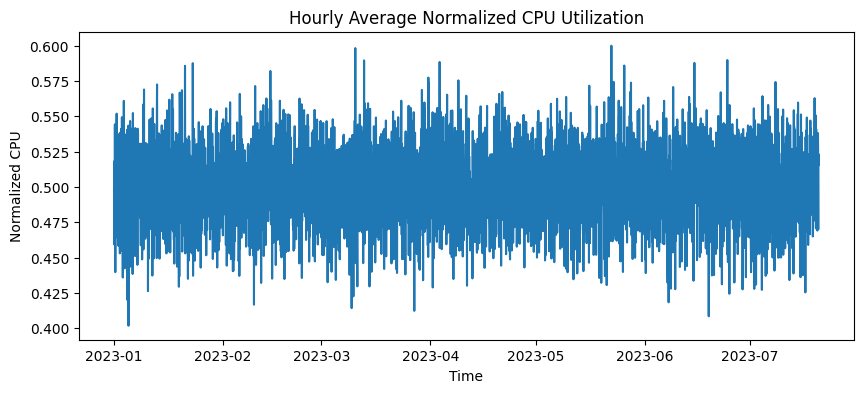

In [93]:
df.set_index('timestamp', inplace=True)
df_resampled = df['cpu_norm'].resample('1H').mean()  # or '1D' for daily averages

plt.figure(figsize=(10,4))
plt.plot(df_resampled.index, df_resampled.values)
plt.title('Hourly Average Normalized CPU Utilization')
plt.xlabel('Time')
plt.ylabel('Normalized CPU')
plt.show()


Columns: ['vm_id', 'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status', 'cpu_norm']

Is Timestamp sorted? True
Earliest timestamp: 2023-01-01 00:00:31
Latest timestamp: 2023-07-20 12:04:18

CPU utilization summary:
count    565039.000000
mean         49.989827
std          28.868401
min           0.000133
25%          24.980584
50%          49.986898
75%          75.032145
max          99.999529
Name: cpu_usage, dtype: float64

Normalized CPU summary:
count    565039.000000
mean          0.499900
std           0.288686
min           0.000000
25%           0.249806
50%           0.499871
75%           0.750325
max           1.000000
Name: cpu_norm, dtype: float64

Unique CPU utilization values (first 20):
[14.01956873 99.07750915 89.88900595 99.51367619 30.08209472 36.46957478
 38.01683426 83.31064358 75.28582228 80.41653378 25.61619959 81.35808809
 61.4089739

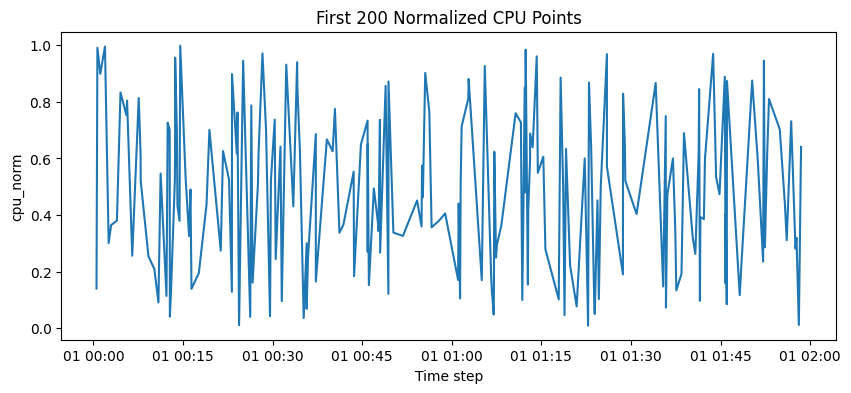

In [100]:
import pandas as pd
import numpy as np

# 1️⃣ Check column names
print("Columns:", df.columns.tolist())

# 2️⃣ Check for sorting
print("\nIs Timestamp sorted?", df.index.is_monotonic_increasing)
print("Earliest timestamp:", df.index.min())
print("Latest timestamp:", df.index.max())

# 3️⃣ Check for constant or nearly constant CPU values
print("\nCPU utilization summary:")
print(df['cpu_usage'].describe()) # Changed 'CPU utilization' to 'cpu_usage' based on df.columns

# 4️⃣ Check if normalization compressed values too tightly
print("\nNormalized CPU summary:")
print(df['cpu_norm'].describe())

# 5️⃣ See unique values (to spot rounding or discrete steps)
print("\nUnique CPU utilization values (first 20):")
print(df['cpu_usage'].unique()[:20]) # Changed 'CPU utilization' to 'cpu_usage' based on df.columns

# 6️⃣ Compute variance and lag-1 autocorrelation
print("\nVariance of normalized CPU:", np.var(df['cpu_norm']))
print("Lag-1 autocorrelation:", df['cpu_norm'].autocorr(lag=1))

# 7️⃣ Quick plot of first 200 normalized values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df['cpu_norm'][:200])
plt.title("First 200 Normalized CPU Points")
plt.xlabel("Time step")
plt.ylabel("cpu_norm")
plt.show()

In [95]:
df['vm_id'].nunique()


565039

In [96]:
df['vm_id'].value_counts().head()


,count
vm_id,
220ceda3-60a1-43b5-a95e-7fe890a6d910,1
fe5e04e3-4ea4-48cf-a193-3f58abd147ed,1
ca081259-cb36-4c07-a7db-5af5f8676930,1
c8e53b6b-07aa-4166-b588-a0c46ce29f3a,1
f190f9e4-8b34-4538-9dc6-e418616ae32e,1


Autocorrleation Function

<Figure size 1000x400 with 0 Axes>

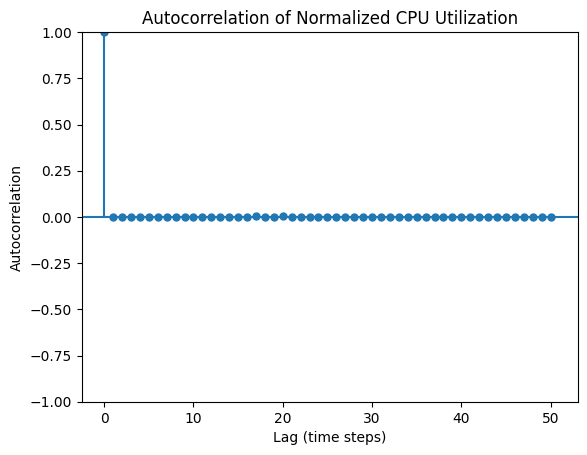

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(df['cpu_norm'], lags=50)
plt.title('Autocorrelation of Normalized CPU Utilization')
plt.xlabel('Lag (time steps)')
plt.ylabel('Autocorrelation')
plt.show()

In [77]:
df['cpu_norm'].describe()


,cpu_norm
count,565039.000000
mean,0.499900
std,0.288686
min,0.000000
25%,0.249806
50%,0.499871
75%,0.750325
max,1.000000


# Exploratory Data Analysis (EDA) Summary

We began by loading the **Kaggle Cloud Computing Performance Metrics** dataset to explore whether it could serve as the foundation for our reinforcement learning (RL) environment for cloud auto-scaling. The dataset contains over **565,000 observations** and includes features such as CPU usage, memory usage, network traffic, power consumption, and task-level attributes (e.g., task type, priority, and status). Our initial objective was to examine how workload utilization behaves over time and assess whether the data captures temporal patterns suitable for reinforcement learning.

---

## 1. Data Structure and Cleaning

We first inspected column names and basic statistics. The dataset includes the following key variables:

- **System metrics:** `cpu_usage`, `memory_usage`, `network_traffic`, `power_consumption`
- **Performance metrics:** `execution_time`, `num_executed_instructions`, `energy_efficiency`
- **Task metadata:** `task_type`, `task_priority`, `task_status`
- **Engineered features:** `cpu_norm`, `trend`, `trend_label`, and `util_bin` (created during preprocessing)

A timestamp variable was present, ranging from **January 1, 2023, to July 20, 2023**, and the data contained no missing values. Each observation corresponded to a distinct **virtual machine (VM)** identified by `vm_id`. Importantly, there were **565,039 unique VM IDs** — one per record — confirming that each row represents a *single snapshot* of a VM’s performance at a given point in time.

---

## 2. Normalization and Feature Engineering

We normalized CPU utilization to the 0–1 range to standardize scale for RL input features:


The distribution of normalized CPU utilization was roughly uniform, with:
- **Mean ≈ 0.50**
- **Standard deviation ≈ 0.29**
- **Range [0, 1]**

We also derived a **trend feature** (`rising`, `flat`, `falling`) and a **utilization bin** (`low`, `medium`, `high`) to examine directional patterns in workload demand.

---

## 3. Visualization and Trend Analysis

An initial time-series plot of normalized CPU utilization showed extreme noise — the line appeared dense and featureless, suggesting high variability between consecutive samples.

A cross-tabulation heatmap of `util_bin` versus `trend_label` revealed asymmetric patterns:
- Low-utilization states were frequently associated with *falling* trends.  
- High-utilization states with *rising* trends.  
- Medium states exhibited more balanced behavior.

However, these patterns did not evolve smoothly over time, hinting that the apparent “trend” may result from random variation rather than temporal dependence.

---

## 4. Temporal Dependence and Autocorrelation

We computed the **autocorrelation function (ACF)** of normalized CPU utilization to quantify time dependence.  
The result was striking:
- Only the zero-lag correlation (self-correlation) was 1.0.  
- All subsequent lags were near zero (**Lag-1 ≈ –0.00017**).

This indicates **no measurable temporal correlation** — the workload values at consecutive timestamps are effectively independent.

Upon further inspection, we confirmed the root cause: since every `vm_id` is unique, each observation represents a *different virtual machine* rather than repeated measurements over time. The dataset is therefore **cross-sectional**, not a continuous time series.

---

## 5. Conclusions from EDA

Our analysis led to several key conclusions:

1. **Dataset nature:**  
   The dataset captures one-time performance snapshots across many VMs rather than continuous workload traces.

2. **No temporal structure:**  
   Because each VM appears only once, there is no inherent sequence of states — explaining the flat autocorrelation and preventing reinforcement learning from modeling transitions or predictive behavior.

3. **Implication for RL:**  
   While the dataset is valuable for understanding workload distributions and system characteristics, it **cannot directly support an RL agent** that requires sequential experience (state → action → next state → reward).

4. **Next step:**  
   We will either:  
   - Construct a **synthetic workload simulator** that mimics realistic time-varying demand based on the statistical properties of `cpu_usage`, or  
   - Integrate a **real trace dataset** (e.g., Google Cluster or Alibaba Cloud workloads) that contains true temporal dependencies suitable for RL training.

---

## 6. Summary Insight

In short, our exploratory analysis clarified that the Kaggle dataset provides a **valuable empirical distribution of cloud workloads**, but **not the temporal dynamics** needed for reinforcement learning.  
This finding is crucial: it ensures that subsequent work — whether through simulation or alternative data sources — will be grounded in a dataset that aligns with the assumptions of the RL framework.
